In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# === CONFIGURACIÓN ===
DATA_PATH = Path('datos_procesados/features')
TARGET_COLS = ['target_t1', 'target_t6', 'target_t12']

In [34]:
# === 1. CARGAR DATOS ===
print("Cargando datasets procesados...")
df_train = pd.read_csv(DATA_PATH / 'btc_features_train.csv')
df_test = pd.read_csv(DATA_PATH / 'btc_features_test.csv')

# Restaurar índice de tiempo
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train.set_index('timestamp', inplace=True)

df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])
df_test.set_index('timestamp', inplace=True)

Cargando datasets procesados...



===== Distribución de target_t1 =====
count    27715.000000
mean         0.000021
std          0.006922
min         -0.099286
25%         -0.002471
50%          0.000051
75%          0.002596
max          0.115689
Name: target_t1, dtype: float64

===== Distribución de target_t6 =====
count    27715.000000
mean         0.000130
std          0.016571
min         -0.132569
25%         -0.005986
50%          0.000110
75%          0.006516
max          0.170271
Name: target_t6, dtype: float64

===== Distribución de target_t12 =====
count    27715.000000
mean         0.000273
std          0.023381
min         -0.197770
25%         -0.009059
50%          0.000075
75%          0.009983
max          0.163171
Name: target_t12, dtype: float64


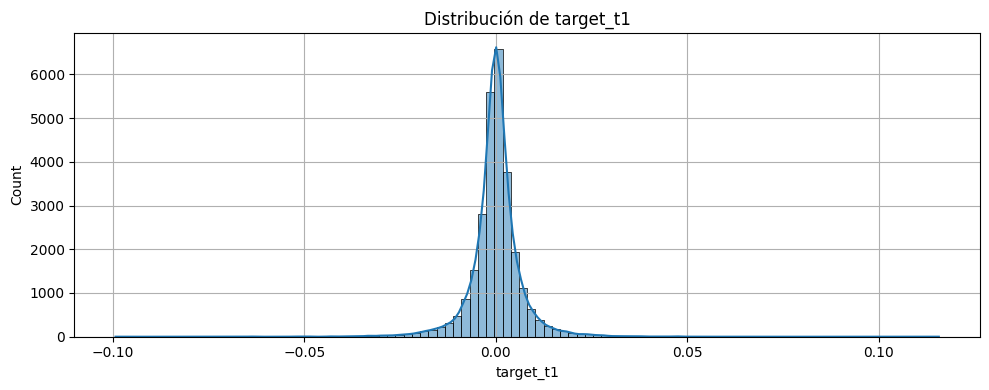

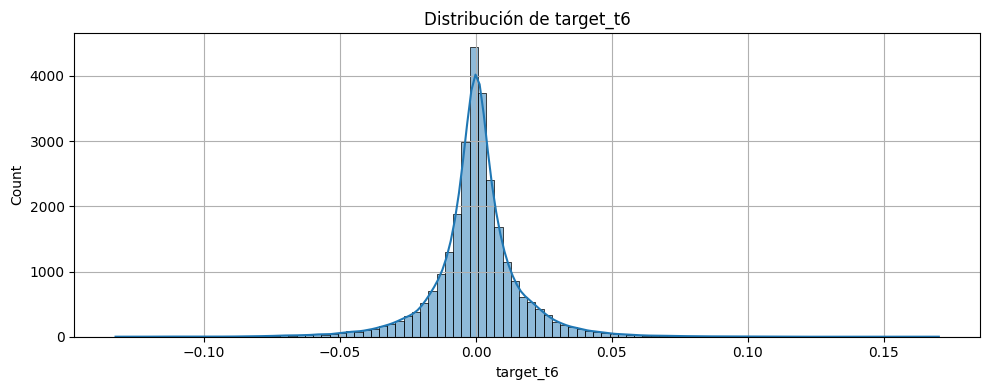

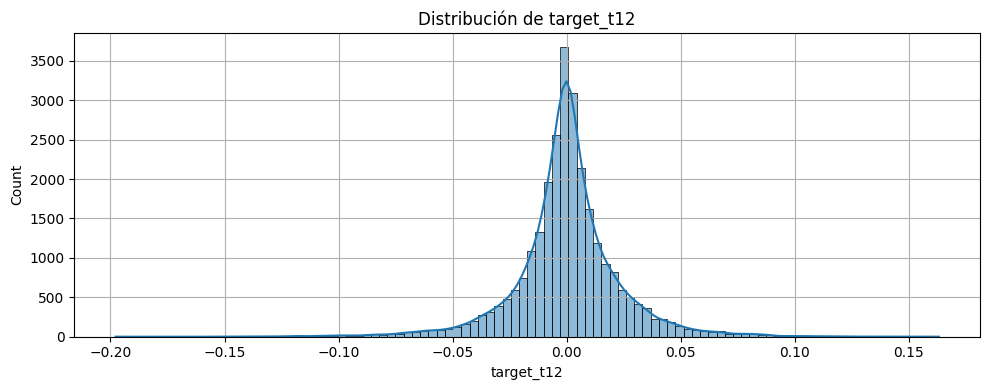

In [35]:
# === 2. DISTRIBUCIÓN DE TARGETS ===
for col in TARGET_COLS:
    print(f"\n===== Distribución de {col} =====")
    print(df_train[col].describe())
    
    plt.figure(figsize=(10, 4))
    sns.histplot(df_train[col], bins=100, kde=True)
    plt.title(f'Distribución de {col}')
    plt.grid(True)
    plt.tight_layout()
#     plt.savefig(f'graficos/xgboost/distribucion_{col}.png')
#     plt.close()

# print("Distribuciones guardadas en 'graficos/xgboost/'")



Calculando correlaciones...

===== Correlación con target_t1 =====
month_cos                  0.010180
year                       0.009050
hour                       0.008552
volatility_24h             0.007312
weekday_cos                0.006825
momentum_168h              0.005944
MACD_diff                  0.005791
TSI                        0.005564
momentum_12h               0.005018
volatility_12h             0.003629
RSI                        0.003147
month_sin                  0.002830
WilliamsR                  0.002322
Stoch_k                    0.002322
weekday_sin                0.002292
Stoch_d                    0.002247
day                        0.002147
hour_sin                   0.001037
return_t3                  0.001001
volatility_48h             0.000443
trend_diff_168h            0.000218
hour_cos                  -0.001866
volatility_168h           -0.002465
CCI                       -0.002616
weekday                   -0.003497
MACD                      -0.003

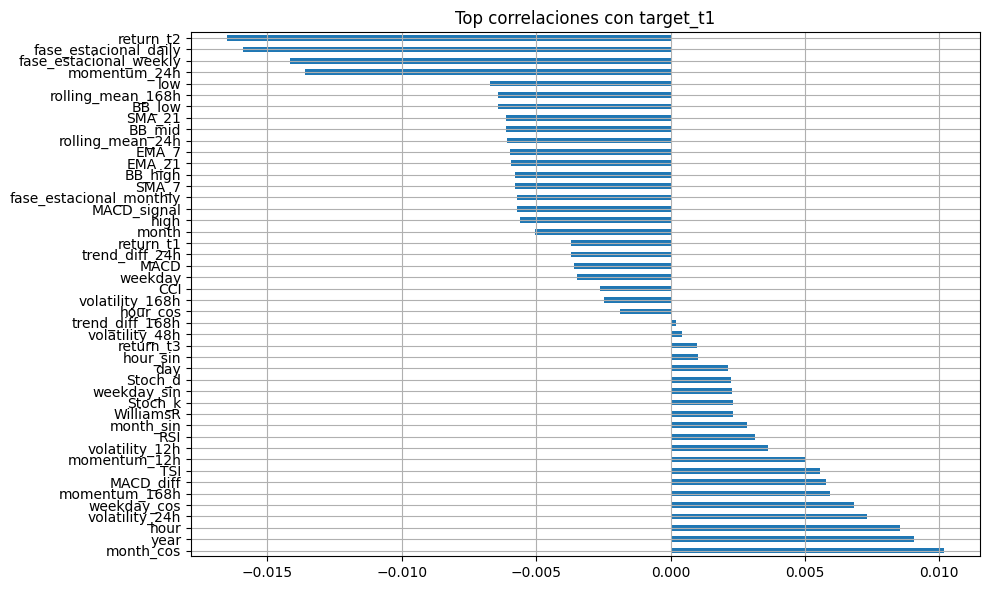

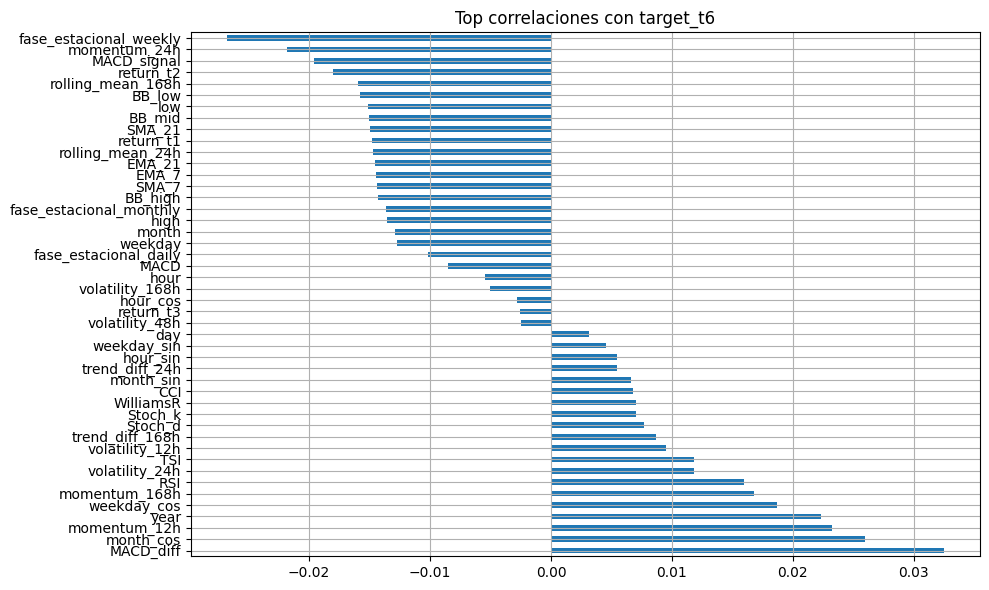

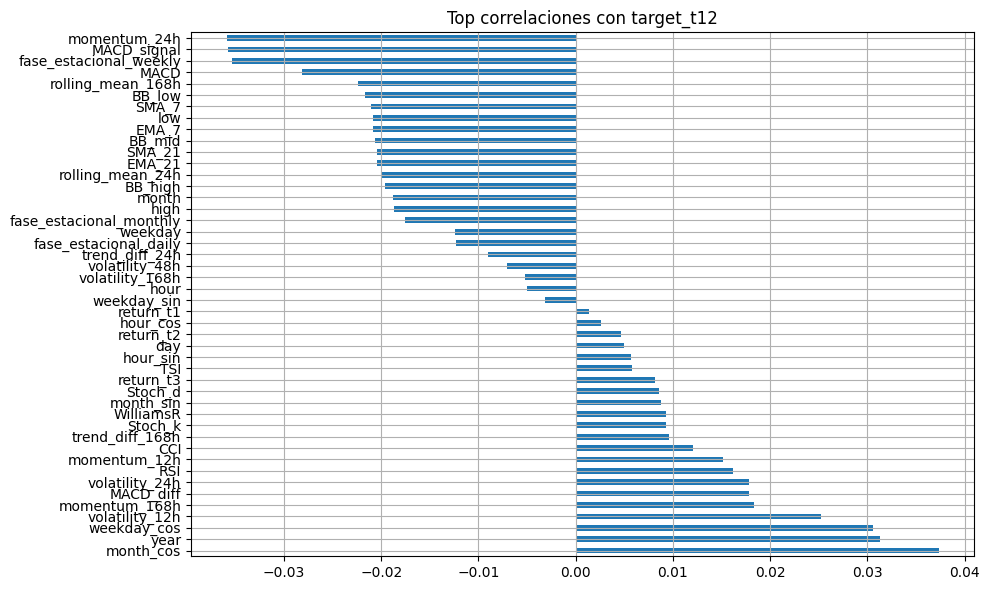

In [36]:
# === 3. CORRELACIÓN ENTRE FEATURES Y TARGETS ===
print("\nCalculando correlaciones...")

# Filtrar features (excluir targets y timestamp)
cols_excluir = ['timestamp'] + TARGET_COLS
feature_cols = [col for col in df_train.columns if col not in cols_excluir and not col.startswith('log_return')]

df_corr = df_train[feature_cols + TARGET_COLS].corr()

for target in TARGET_COLS:
    print(f"\n===== Correlación con {target} =====")
    corr_target = df_corr[target].drop(labels=TARGET_COLS)
    print(corr_target.sort_values(ascending=False))

    plt.figure(figsize=(10, 6))
    corr_target.sort_values(ascending=False).plot(kind='barh')
    plt.title(f'Top correlaciones con {target}')
    plt.grid(True)
    plt.tight_layout()
#     plt.savefig(f'graficos/xgboost/correlacion_{target}.png')
#     plt.close()

# print("Correlaciones guardadas en 'graficos/xgboost/'")



# Modelo XGBOOST Dummy

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [39]:

# === Cargar datasets ===
df_train = pd.read_csv('datos_procesados/features/btc_features_train.csv')
df_test = pd.read_csv('datos_procesados/features/btc_features_test.csv')

# === Ver head ===
print("HEAD TRAIN:")
df_train.head()


HEAD TRAIN:


,timestamp,hour,day,weekday,month,year,fase_estacional_daily,fase_estacional_weekly,fase_estacional_monthly,high,...,volatility_168h,momentum_12h,momentum_24h,momentum_168h,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,2021-01-15 10:00:00+00:00,10,15,4,1,-1.233083,-0.337549,-1.341980,1.357967,0.253155,...,3.298143,-0.153078,0.504408,-0.020400,0.707426,-1.224470,-0.613312,-1.273783,0.651871,1.201479
1,2021-01-15 11:00:00+00:00,11,15,4,1,-1.233083,0.562506,-1.341980,1.357967,0.253155,...,3.293678,-0.587476,-0.080568,-0.198690,0.366317,-1.365738,-0.613312,-1.273783,0.651871,1.201479
2,2021-01-15 12:00:00+00:00,12,15,4,1,-1.233083,-0.337549,-0.447488,1.357967,0.253155,...,3.295114,-1.185271,-0.246757,-0.213581,0.000261,-1.413923,-0.613312,-1.273783,0.651871,1.201479
3,2021-01-15 13:00:00+00:00,13,15,4,1,-1.233083,1.462560,0.447004,1.357967,0.253155,...,3.276420,-1.856320,-0.421271,-0.509749,-0.365795,-1.365738,-0.613312,-1.273783,0.651871,1.201479
4,2021-01-15 14:00:00+00:00,14,15,4,1,-1.233083,-0.337549,-0.447488,1.357967,0.253155,...,3.198503,-1.661368,-1.075781,-0.926415,-0.706905,-1.224470,-0.613312,-1.273783,0.651871,1.201479


In [41]:

print("\nHEAD TEST:")
df_test.head()


HEAD TEST:


,timestamp,hour,day,weekday,month,year,fase_estacional_daily,fase_estacional_weekly,fase_estacional_monthly,high,...,volatility_168h,momentum_12h,momentum_24h,momentum_168h,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,2024-03-22 13:00:00+00:00,13,22,4,3,2.006858,-1.237603,-1.34198,0.46472,2.284234,...,0.727148,-0.994023,-1.382110,-0.652818,-0.365795,-1.365738,-0.613312,-1.273783,1.354898,-0.032773
1,2024-03-22 14:00:00+00:00,14,22,4,3,2.006858,0.562506,-1.34198,0.46472,2.279405,...,0.760521,-1.439438,-1.710078,-0.950398,-0.706905,-1.224470,-0.613312,-1.273783,1.354898,-0.032773
2,2024-03-22 15:00:00+00:00,15,22,4,3,2.006858,0.562506,-1.34198,0.46472,2.279405,...,0.762149,-1.959494,-1.935381,-1.046053,-0.999822,-0.999743,-0.613312,-1.273783,1.354898,-0.032773
3,2024-03-22 16:00:00+00:00,16,22,4,3,2.006858,0.562506,-1.34198,0.46472,2.253300,...,0.799703,-1.386722,-1.236147,-0.763117,-1.224586,-0.706874,-0.613312,-1.273783,1.354898,-0.032773
4,2024-03-22 17:00:00+00:00,17,22,4,3,2.006858,-0.337549,-1.34198,0.46472,2.253300,...,0.808482,-1.950524,-1.640884,-0.830267,-1.365878,-0.365821,-0.613312,-1.273783,1.354898,-0.032773


In [42]:
# === Convertir timestamp y fijar índice ===
for df in [df_train, df_test]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

# === Seleccionar target y features ===
target = 'target_t6'
cols_excluir = ['timestamp', 'target_t1', 'target_t6', 'target_t12']
feature_cols = [col for col in df_train.columns if col not in cols_excluir]

print(f"\nFeatures usadas: {feature_cols}")


Features usadas: ['hour', 'day', 'weekday', 'month', 'year', 'fase_estacional_daily', 'fase_estacional_weekly', 'fase_estacional_monthly', 'high', 'low', 'return_t1', 'return_t2', 'return_t3', 'SMA_7', 'SMA_21', 'EMA_7', 'EMA_21', 'MACD', 'MACD_signal', 'MACD_diff', 'RSI', 'Stoch_k', 'Stoch_d', 'BB_high', 'BB_low', 'BB_mid', 'rolling_mean_24h', 'rolling_mean_168h', 'trend_diff_24h', 'trend_diff_168h', 'CCI', 'WilliamsR', 'TSI', 'trend_3', 'trend_up', 'swing_high', 'swing_low', 'hammer', 'price_speed', 'volatility_12h', 'volatility_24h', 'volatility_48h', 'volatility_168h', 'momentum_12h', 'momentum_24h', 'momentum_168h', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']


In [43]:

X_train = df_train[feature_cols]
y_train = df_train[target]
X_test = df_test[feature_cols]
y_test = df_test[target]

In [46]:
X_train.head().T

timestamp,2021-01-15 10:00:00+00:00,2021-01-15 11:00:00+00:00,2021-01-15 12:00:00+00:00,2021-01-15 13:00:00+00:00,2021-01-15 14:00:00+00:00
hour,10,11,12,13,14
day,15,15,15,15,15
weekday,4,4,4,4,4
month,1,1,1,1,1
year,-1.233083,-1.233083,-1.233083,-1.233083,-1.233083
fase_estacional_daily,-0.337549,0.562506,-0.337549,1.46256,-0.337549
fase_estacional_weekly,-1.34198,-1.34198,-0.447488,0.447004,-0.447488
fase_estacional_monthly,1.357967,1.357967,1.357967,1.357967,1.357967
high,0.253155,0.253155,0.253155,0.253155,0.253155
low,0.214933,0.214933,0.211692,0.201961,0.142366


In [45]:
y_train.head()

timestamp
2021-01-15 10:00:00+00:00   -0.060420
2021-01-15 11:00:00+00:00   -0.057044
2021-01-15 12:00:00+00:00   -0.064515
2021-01-15 13:00:00+00:00   -0.066908
2021-01-15 14:00:00+00:00   -0.035248
Name: target_t6, dtype: float64

In [47]:
# === Entrenar modelo simple ===
modelo = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    n_jobs=-1
)
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [48]:
# === Predicción y evaluación ===
y_pred = modelo.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:

print(f"\n📊 Métricas para {target}:")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2: {r2:.6f}")


📊 Métricas para target_t6:
RMSE: 0.017475
MAE: 0.013520
R2: -0.775578


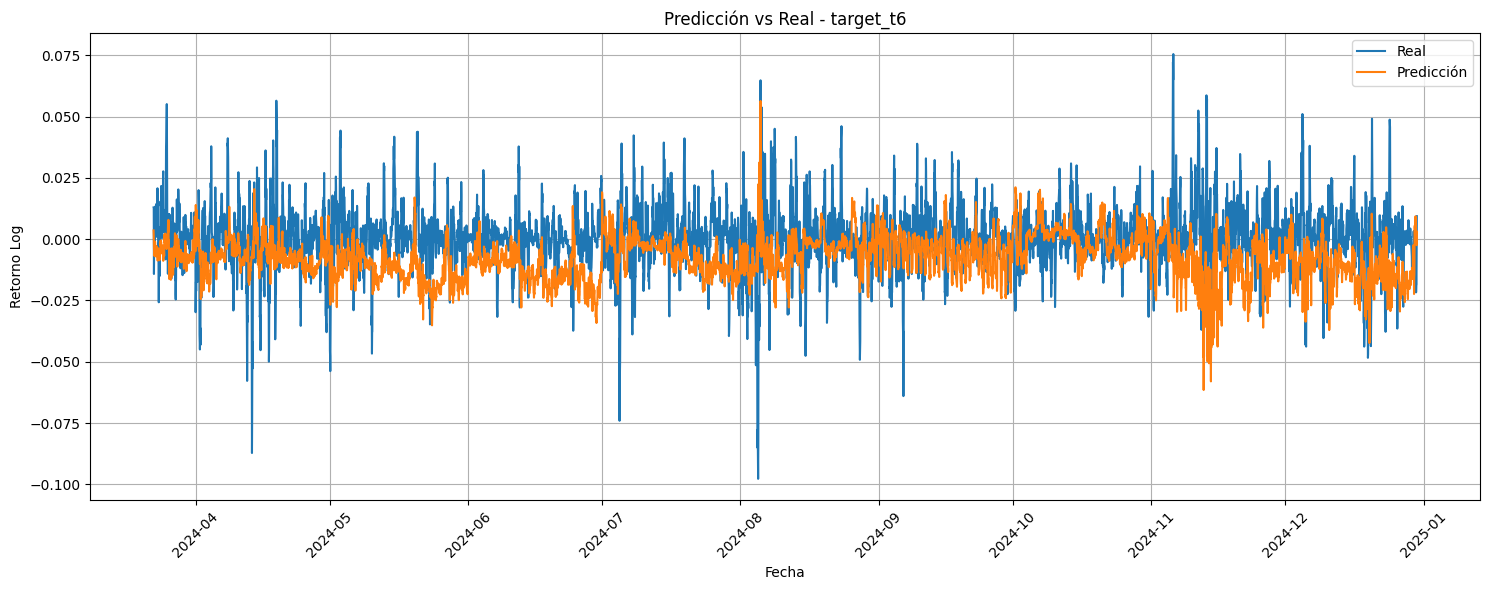

In [51]:
# === Gráfico de predicción ===
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test.values, label='Real')
plt.plot(y_test.index, y_pred, label='Predicción')
plt.title(f'Predicción vs Real - {target}')
plt.xlabel('Fecha')
plt.ylabel('Retorno Log')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# === Importancia de características ===
importancias = modelo.feature_importances_
df_importancia = pd.DataFrame({
    'feature': feature_cols,
    'importance': importancias
}).sort_values(by='importance', ascending=False)


📌 Importancia de características:
              feature  importance
26   rolling_mean_24h    0.037437
25             BB_mid    0.034516
51          month_cos    0.031680
14             SMA_21    0.031648
24             BB_low    0.030795
3               month    0.026580
27  rolling_mean_168h    0.026172
29    trend_diff_168h    0.025166
45      momentum_168h    0.025031
49        weekday_cos    0.024582


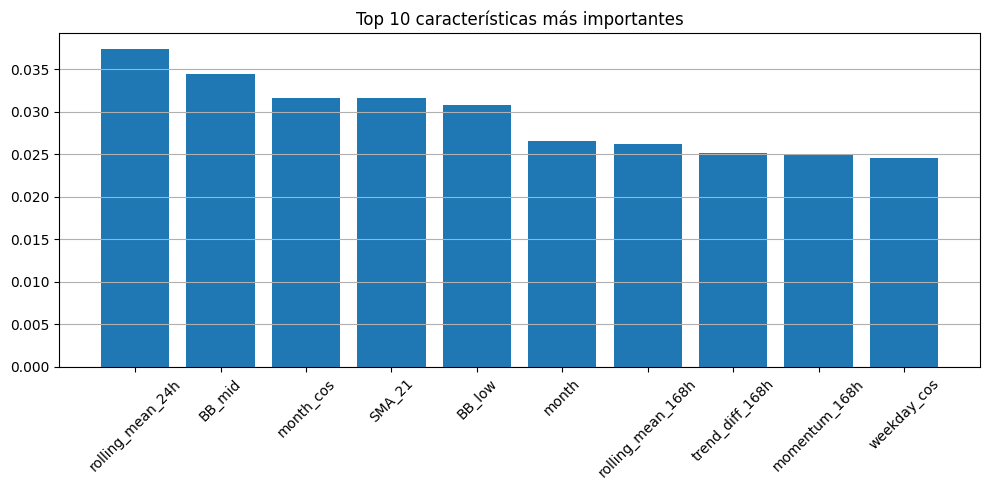

In [53]:
print("\n📌 Importancia de características:")
print(df_importancia.head(10))

# Gráfico
plt.figure(figsize=(10,5))
plt.bar(df_importancia['feature'][:10], df_importancia['importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 características más importantes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pruebas comando PY XGboost

In [55]:
df_train = pd.read_csv('datos_procesados/features/btc_features_train.csv')
df_test = pd.read_csv('datos_procesados/features/btc_features_test.csv')

In [58]:
df_train.head().T

,0,1,2,3,4
timestamp,2021-01-15 10:00:00+00:00,2021-01-15 11:00:00+00:00,2021-01-15 12:00:00+00:00,2021-01-15 13:00:00+00:00,2021-01-15 14:00:00+00:00
hour,10,11,12,13,14
day,15,15,15,15,15
weekday,4,4,4,4,4
month,1,1,1,1,1
year,-1.233083,-1.233083,-1.233083,-1.233083,-1.233083
fase_estacional_daily,-0.337549,0.562506,-0.337549,1.46256,-0.337549
fase_estacional_weekly,-1.34198,-1.34198,-0.447488,0.447004,-0.447488
fase_estacional_monthly,1.357967,1.357967,1.357967,1.357967,1.357967
high,0.253155,0.253155,0.253155,0.253155,0.253155



HEAD TEST:
                   timestamp  hour  day  weekday  month      year  \
0  2024-03-22 13:00:00+00:00    13   22        4      3  2.006858   
1  2024-03-22 14:00:00+00:00    14   22        4      3  2.006858   
2  2024-03-22 15:00:00+00:00    15   22        4      3  2.006858   
3  2024-03-22 16:00:00+00:00    16   22        4      3  2.006858   
4  2024-03-22 17:00:00+00:00    17   22        4      3  2.006858   

   fase_estacional_daily  fase_estacional_weekly  fase_estacional_monthly  \
0              -1.237603                -1.34198                  0.46472   
1               0.562506                -1.34198                  0.46472   
2               0.562506                -1.34198                  0.46472   
3               0.562506                -1.34198                  0.46472   
4              -0.337549                -1.34198                  0.46472   

       high  ...  volatility_168h  momentum_12h  momentum_24h  momentum_168h  \
0  2.284234  ...         0.727

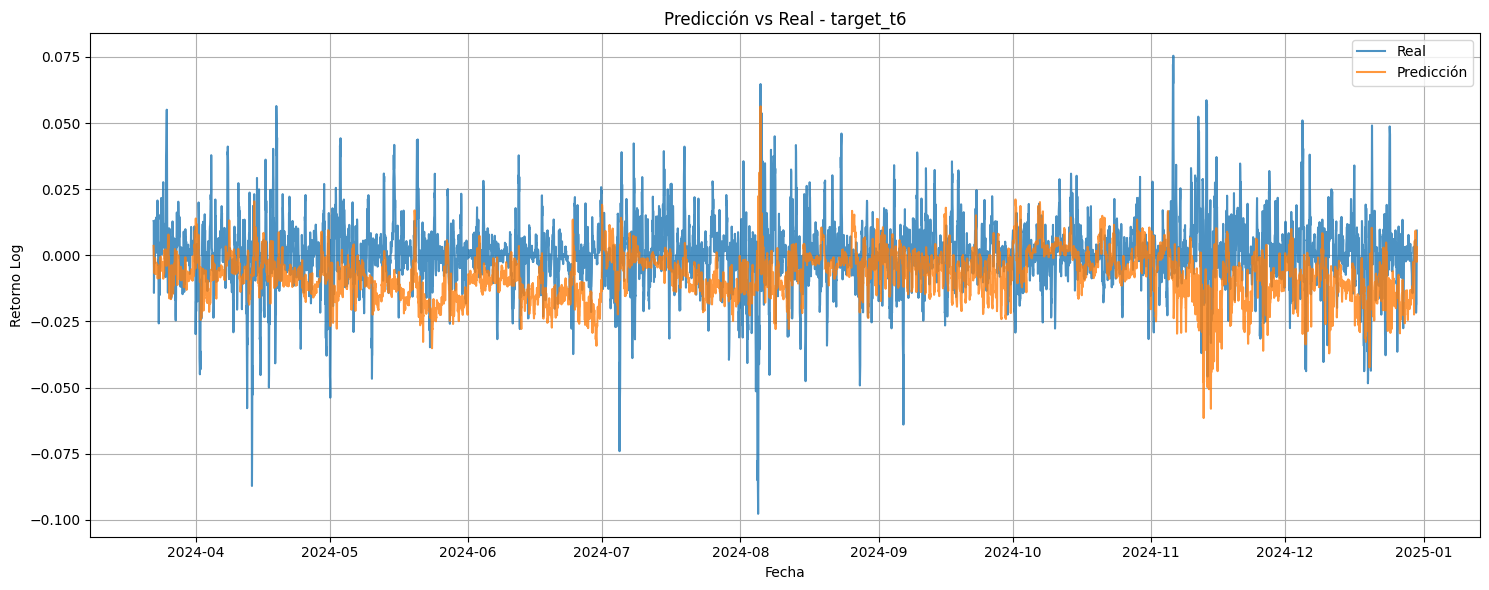

In [59]:
# Paso 1: Configuraciones iniciales y carga de datos
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === CARGA ===
df_train = pd.read_csv('datos_procesados/features/btc_features_train.csv')
df_test = pd.read_csv('datos_procesados/features/btc_features_test.csv')

print("\nHEAD TEST:")
print(df_test.head())

# === Convertir timestamp y fijar índice ===
for df in [df_train, df_test]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

# === Seleccionar target y features ===
target = 'target_t6'
cols_excluir = ['timestamp', 'target_t1', 'target_t6', 'target_t12']
feature_cols = [col for col in df_train.columns if col not in cols_excluir]

print(f"\nFeatures usadas: {feature_cols}")

X_train = df_train[feature_cols]
y_train = df_train[target]
X_test = df_test[feature_cols]
y_test = df_test[target]

print("\nHEAD X_train transpuesto:")
print(X_train.head().T)

print("\nHEAD y_train:")
print(y_train.head())

# === Entrenar modelo simple ===
modelo = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    n_jobs=-1
)
modelo.fit(X_train, y_train)

# === Predicción y evaluación ===
y_pred = modelo.predict(X_test)

# === Métricas ===
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo simple:")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2: {r2:.6f}")

# === Gráfico ===
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Real', alpha=0.8)
plt.plot(y_test.index, y_pred, label='Predicción', alpha=0.8)
plt.title('Predicción vs Real - target_t6')
plt.xlabel('Fecha')
plt.ylabel('Retorno Log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Evaluación tras RandomizedSearchCV (1 iteración):
Mean pred: -0.007989
Std pred: 0.008716


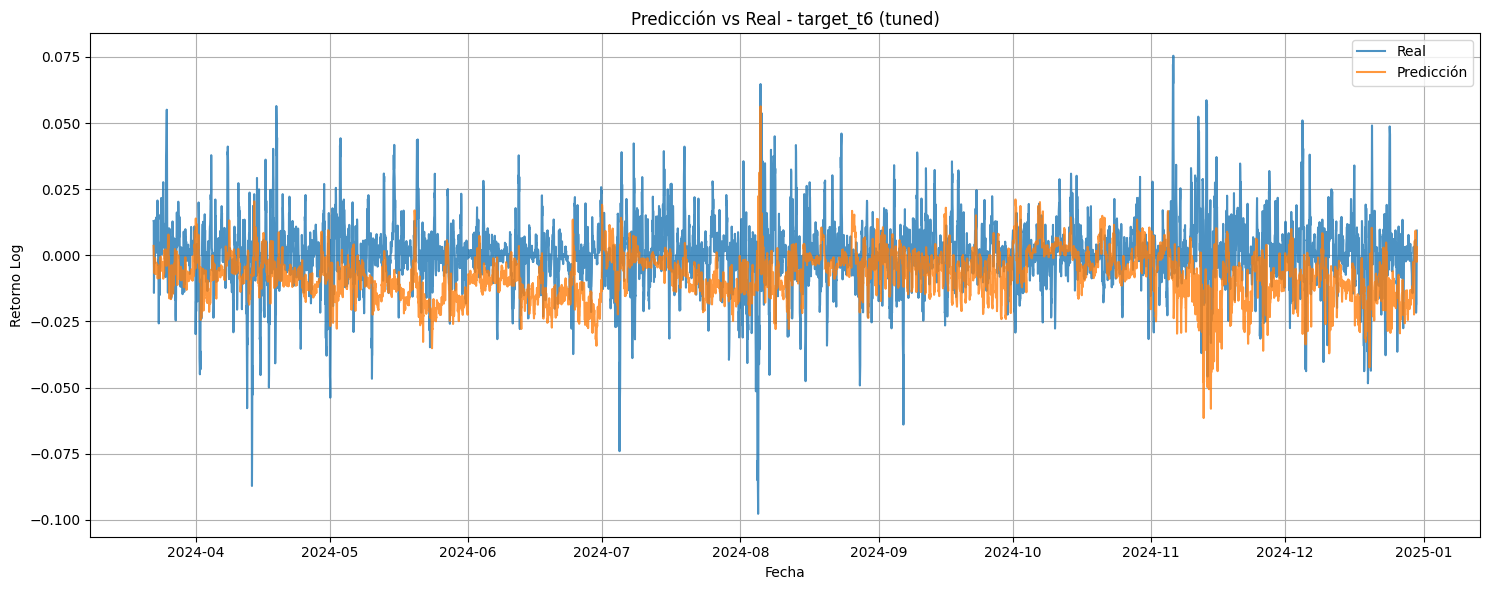

In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# === 1. Definir distribuciones mínimas
param_distributions = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [5],
}

# === 2. Configurar modelo base
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse'
)

# === 3. Validación temporal
tscv = TimeSeriesSplit(n_splits=5)

# === 4. Ejecutar búsqueda
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=1,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# === 5. Predecir
modelo_tuned = random_search.best_estimator_
y_pred_tuned = modelo_tuned.predict(X_test)

# === 6. Métricas básicas
print("Evaluación tras RandomizedSearchCV (1 iteración):")
print(f"Mean pred: {np.mean(y_pred_tuned):.6f}")
print(f"Std pred: {np.std(y_pred_tuned):.6f}")

# === 7. Graficar predicción vs real
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Real', alpha=0.8)
plt.plot(y_test.index, y_pred_tuned, label='Predicción', alpha=0.8)
plt.title("Predicción vs Real - target_t6 (tuned)")
plt.xlabel("Fecha")
plt.ylabel("Retorno Log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluar_modelo(y_true, y_pred, titulo=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{titulo}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE:  {mae:.6f}")
    print(f"R2:   {r2:.6f}")
    return rmse, mae, r2

# Usamos la función con los resultados anteriores
evaluar_modelo(y_test, y_pred_tuned, "Métricas test (modelo tuned)")



Métricas test (modelo tuned)
RMSE: 0.017475
MAE:  0.013520
R2:   -0.775578


(np.float64(0.017475315997627035), 0.013519605223560936, -0.7755781920598095)